# Data Visualisation, Evaluation and Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 Answer analysis

In [2]:
# Read files
cons_base_lev = pd.read_excel('../answers/rated/consumer_bert_base_levenshtein-14-05.xlsx')
cons_base_sim = pd.read_excel('../answers/rated/consumer_bert_base_similarity-14-05.xlsx')
cons_bio_lev = pd.read_excel('../answers/rated/consumer_biobert_levenshtein-19-05.xlsx')
cons_bio_sim = pd.read_excel('../answers/rated/consumer_biobert_similarity-19-05.xlsx')

exp_base_lev = pd.read_excel('../answers/rated/expert_bert_base_levenshtein-18-05.xlsx')
exp_base_sim = pd.read_excel('../answers/rated/expert_bert_base_similarity-18-05.xlsx')
exp_bio_lev = pd.read_excel('../answers/rated/expert_biobert_levenshtein-19-05.xlsx')
exp_bio_sim = pd.read_excel('../answers/rated/expert_biobert_similarity-18-05.xlsx')

### 1.1 Answer length

In [3]:
# Answer length
def answer_length(filename):
    nan = [a for a in filename['Answer'].isnull().values]

    answer_len = []

    for a, n in zip(filename['Answer'], [a for a in filename['Answer'].isnull().values]):
        # Check if answer length == 0 for questions without answers
        if n == False:
            answer_len.append(len(a.split(' ')))
        else:
            answer_len.append(0)
    filename['Answer length'] = answer_len
    
    return filename

In [4]:
# Consumer answers
print('Consumer average answer length\n\n')
cons_df_base_lev = answer_length(cons_base_lev)
print('Consumer BERT base (Levenshtein): ', cons_df_base_lev['Answer length'].mean())
#df.to_excel('../answers/rated/consumer_bert_base_levenshtein-28-05.xlsx')
print('-----------------------------------------------------------')
cons_df_base_sim = answer_length(cons_base_sim)
print('Consumer BERT base (Similarity): ', cons_df_base_sim['Answer length'].mean())
#df.to_excel('../answers/rated/consumer_bert_base_similarity-28-05.xlsx')
print('-----------------------------------------------------------')
cons_df_bio_lev = answer_length(cons_bio_lev)
print('Consumer BioBERT (Levenshtein): ', cons_df_bio_lev['Answer length'].mean())
#df.to_excel('../answers/rated/consumer_biobert_levenshtein-28-05.xlsx')
print('-----------------------------------------------------------')
cons_df_bio_sim = answer_length(cons_bio_sim)
print('Consumer BioBERT (Similarity): ', cons_df_bio_sim['Answer length'].mean())
#df.to_excel('../answers/rated/consumer_biobert_similarity-28-05.xlsx')

Consumer average answer length


Consumer BERT base (Levenshtein):  7.270833333333333
-----------------------------------------------------------
Consumer BERT base (Similarity):  10.448979591836734
-----------------------------------------------------------
Consumer BioBERT (Levenshtein):  6.083333333333333
-----------------------------------------------------------
Consumer BioBERT (Similarity):  9.020833333333334


In [5]:
# Expert answers
print('Expert average answer length\n\n')
exp_df_base_lev = answer_length(exp_base_lev)
print('Expert BERT base (Levenshtein): ', exp_df_base_lev['Answer length'].mean())
#df.to_excel('../answers/rated/expert_bert_base_levenshtein-28-05.xlsx')
print('-----------------------------------------------------------')
exp_df_base_sim = answer_length(exp_base_sim)
print('Expert BERT base (Similarity): ', exp_df_base_sim['Answer length'].mean())
#df.to_excel('../answers/rated/expert_bert_base_similarity-28-05.xlsx')
print('-----------------------------------------------------------')
exp_df_bio_lev = answer_length(exp_bio_lev)
print('Expert BioBERT (Levenshtein): ', exp_df_bio_lev['Answer length'].mean())
#df.to_excel('../answers/rated/expert_biobert_levenshtein-28-05.xlsx')
print('-----------------------------------------------------------')
exp_df_bio_sim = answer_length(exp_bio_sim)
print('Expert BioBERT (Similarity): ', exp_df_bio_sim['Answer length'].mean())
#df.to_excel('../answers/rated/expert_biobert_similarity-28-05.xlsx')

Expert average answer length


Expert BERT base (Levenshtein):  5.862745098039215
-----------------------------------------------------------
Expert BERT base (Similarity):  9.607843137254902
-----------------------------------------------------------
Expert BioBERT (Levenshtein):  6.196078431372549
-----------------------------------------------------------
Expert BioBERT (Similarity):  9.92156862745098


### 1. 2 Answer scores

In [6]:
# Plot histogram of scores for non-expert answers
def plot_scores(filename_base_lev, filename_base_sim, filename_bio_lev, filename_bio_sim, title):
    df_base_scores = pd.DataFrame({
        'BERT base Levenshtein distance':filename_base_lev['Average score (Oniani et al.)'],
        'BERT base embedding similarity':filename_base_sim['Average score (Oniani et al.)']
    })
    
    df_bio_scores = pd.DataFrame({
        'BioBERT Levenshtein distance':filename_bio_lev['Average score (Oniani et al.)'],
        'BioBERT embedding similarity':filename_bio_sim['Average score (Oniani et al.)']
    })
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
    
    df_base_scores.plot.hist(ax=ax1, alpha=0.6, stacked=False)
    
    df_bio_scores.plot.hist(ax=ax2, alpha=0.6, stacked=False)
    fig.suptitle(title)
    plt.tight_layout()
    
    #plt.savefig('plots/'+title+'.png')

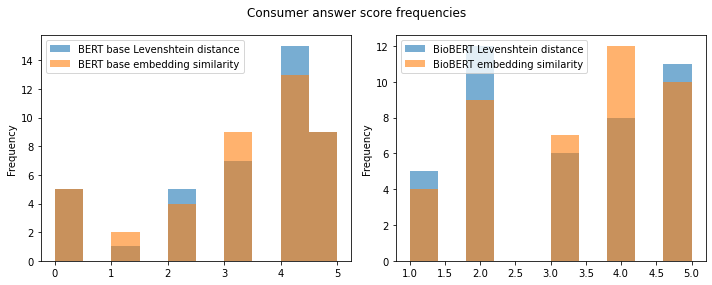

In [7]:
# Consumer scores
plot_scores(cons_base_lev, cons_base_sim, cons_bio_lev, cons_bio_sim,'Consumer answer score frequencies')

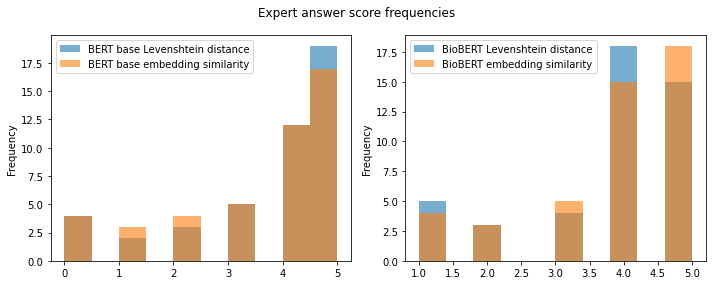

In [8]:
# Expert scores
plot_scores(exp_base_lev, exp_base_sim, exp_bio_lev, exp_bio_sim,'Expert answer score frequencies')

### 1.3 Answer function

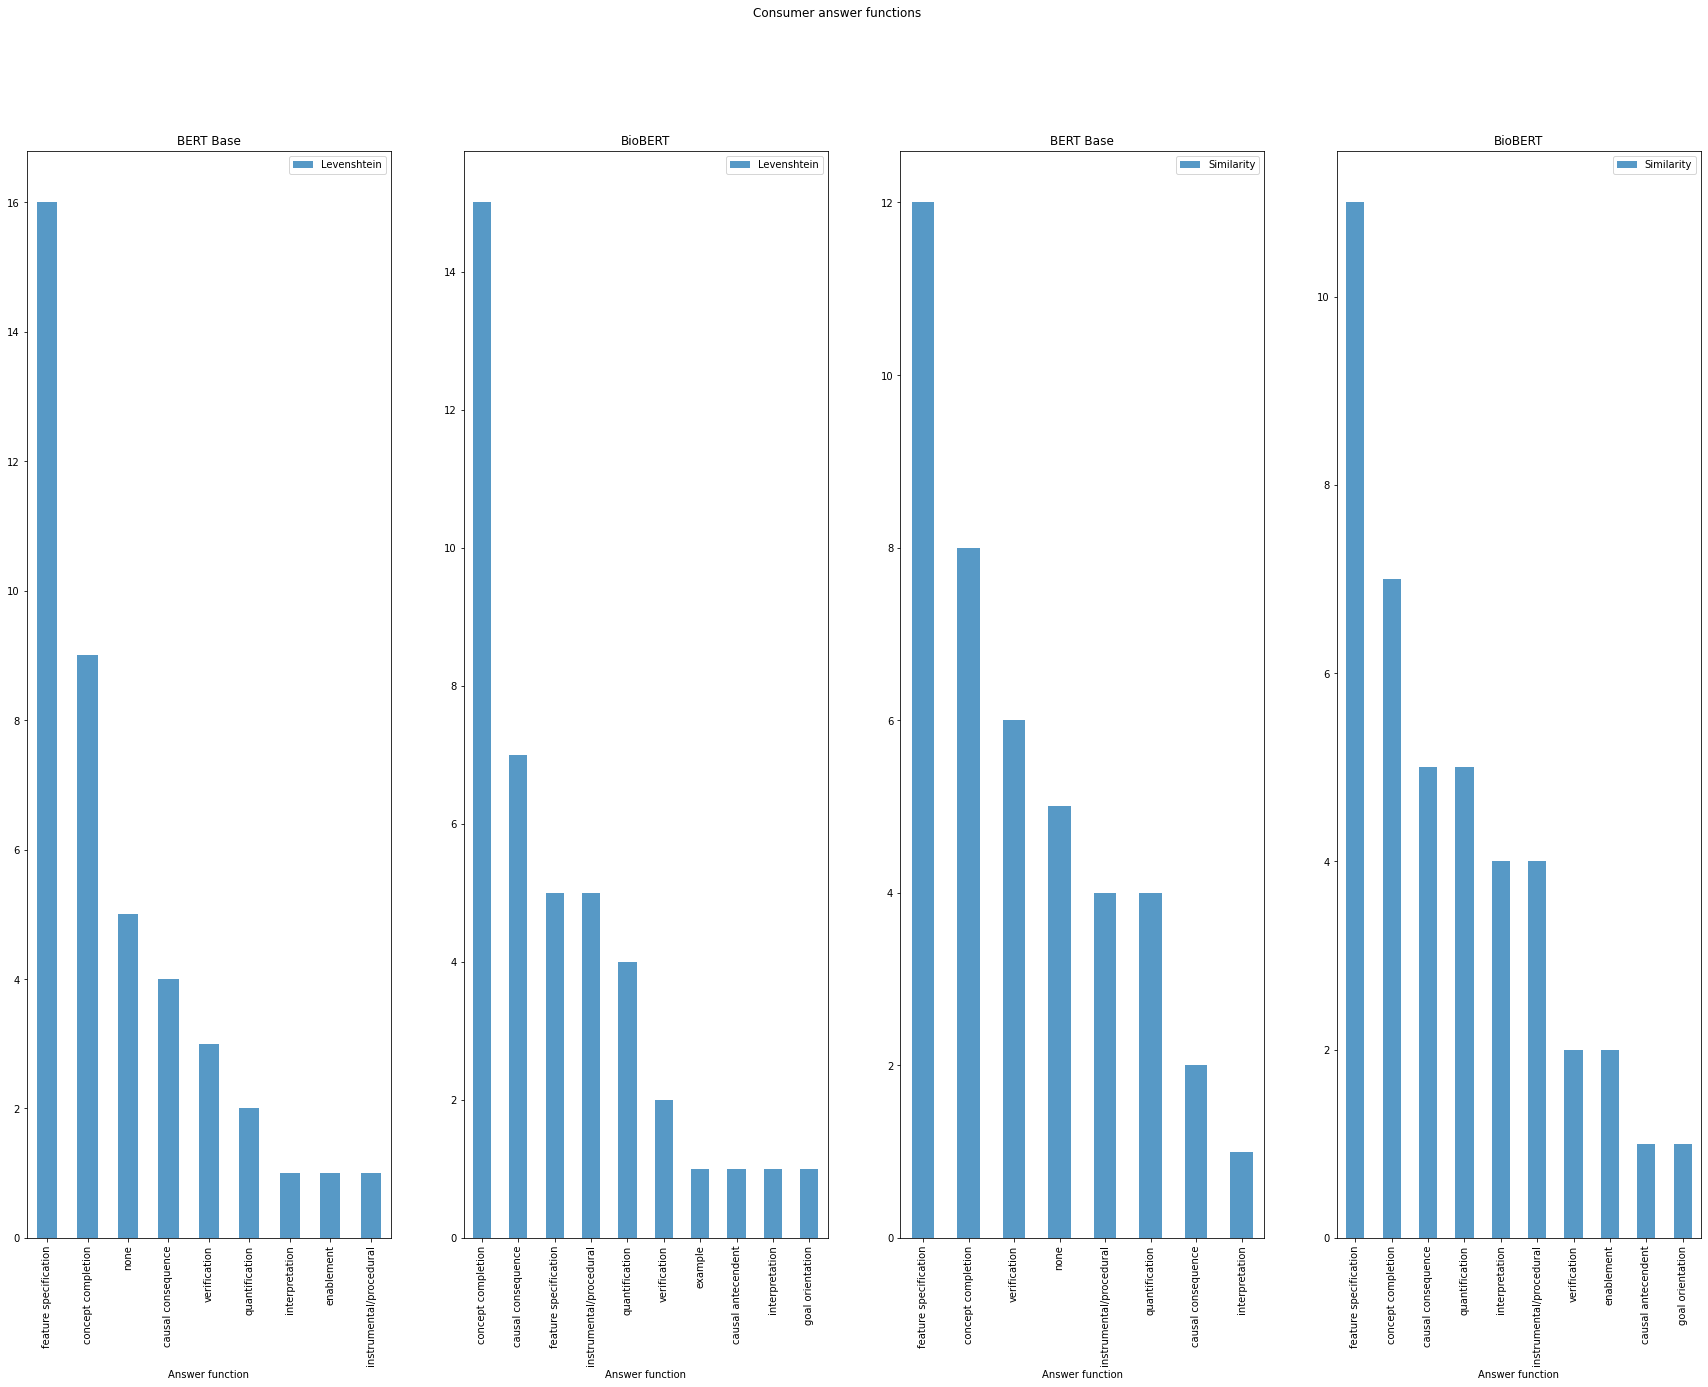

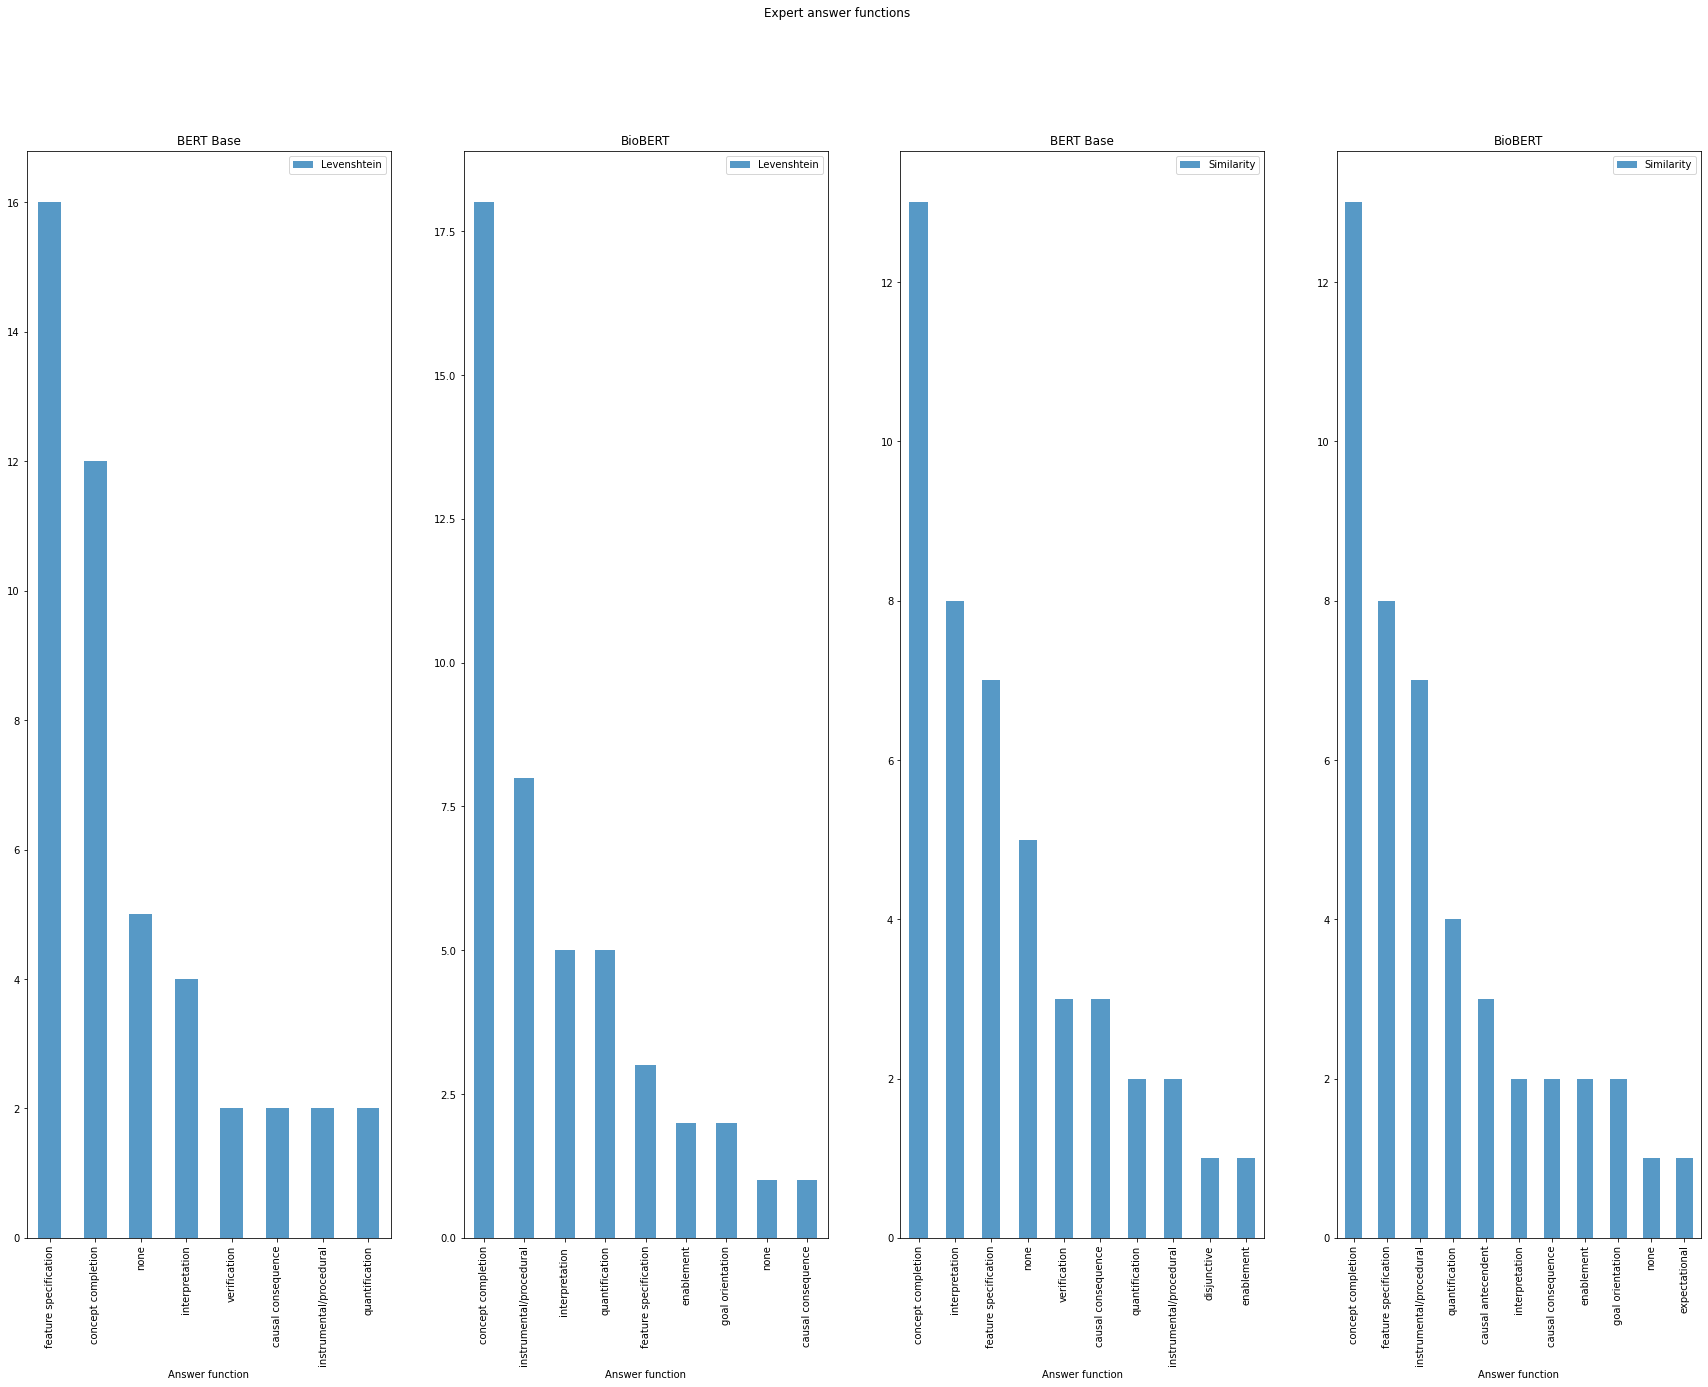

In [128]:
def answer_functions(question_set):
    # Check how often 'gold' functions and predicted answer function match
    # Frequency distribution of answer functions 
    functions = ['concept completion','verification','disjunctive','concept completion','feature specification','quantification','definition','example','comparison','interpretation','causal antecendent'
                 ,'causal consequence','goal orientation','instrumental/procedural','enablement','expectational','judgmental',
                 'assertion','request/directive']
    
    # Which question set to evaluate
    if question_set == 'Consumer':
        df_base_lev = cons_df_base_lev['Predicted answer function'].value_counts()
        df_base_sim = cons_df_base_sim['Predicted answer function'].value_counts()
        df_bio_lev = cons_df_bio_lev['Predicted answer function'].value_counts()
        df_bio_sim = cons_df_bio_sim['Predicted answer function'].value_counts()
        
        # Plot values by model, answer selection criteria by model
        fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(30,20))

        df_base_lev = pd.DataFrame({ 'Answer function':['feature specification', 'concept completion', 'none', 'causal consequence', 'verification', 'quantification', 'interpretation', 'enablement', 'instrumental/procedural'], 'Levenshtein':df_base_lev})
        df_base_lev = df_base_lev[["Answer function","Levenshtein"]]
        df_base_lev.set_index(["Answer function"],inplace=True)
        df_base_lev.plot(ax=ax1, kind='bar',alpha=0.75, rot=90, title='BERT Base')

        df_bio_lev = pd.DataFrame({ 'Answer function':['concept completion', 'causal consequence', 'feature specification', 'instrumental/procedural', 'quantification', 'verification', 'example', 'causal antecendent', 'interpretation', 'goal orientation'], 'Levenshtein':df_bio_lev})
        df_bio_lev = df_bio_lev[["Answer function","Levenshtein"]]
        df_bio_lev.set_index(["Answer function"],inplace=True)
        df_bio_lev.plot(ax=ax2, kind='bar',alpha=0.75, rot=90, title='BioBERT')

        df_base_sim = pd.DataFrame({ 'Answer function':['feature specification', 'concept completion', 'verification', 'none', 'instrumental/procedural', 'quantification', 'causal consequence', 'interpretation'], 'Similarity':df_base_sim})
        df_base_sim = df_base_sim[["Answer function","Similarity"]]
        df_base_sim.set_index(["Answer function"],inplace=True)
        df_base_sim.plot(ax=ax3, kind='bar',alpha=0.75, rot=90, title='BERT Base')

        df_bio_sim = pd.DataFrame({ 'Answer function':['feature specification', 'concept completion', 'causal consequence', 'quantification', 'interpretation', 'instrumental/procedural', 'verification', 'enablement', 'causal antecendent', 'goal orientation'], 'Similarity':df_bio_sim})
        df_bio_sim = df_bio_sim[["Answer function","Similarity"]]
        df_bio_sim.set_index(["Answer function"],inplace=True)
        df_bio_sim.plot(ax=ax4, kind='bar',alpha=0.75, rot=90, title='BioBERT')
        
        plt.suptitle('Consumer answer functions')
        plt.xticks(rotation=90)
        plt.savefig('plots/cons_answ_functions.png')
    else:
        df_base_lev = exp_df_base_lev['Predicted answer function'].value_counts()
        df_base_sim = exp_df_base_sim['Predicted answer function'].value_counts()
        df_bio_lev = exp_df_bio_lev['Predicted answer function'].value_counts()
        df_bio_sim = exp_df_bio_sim['Predicted answer function'].value_counts()    

        # Plot values by model, answer selection criteria by model
        fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(30,20))

        df_base_lev = pd.DataFrame({ 'Answer function':['feature specification', 'concept completion', 'none', 'interpretation', 'verification', 'causal consequence', 'instrumental/procedural', 'quantification'], 'Levenshtein':df_base_lev})
        df_base_lev = df_base_lev[["Answer function","Levenshtein"]]
        df_base_lev.set_index(["Answer function"],inplace=True)
        df_base_lev.plot(ax=ax1, kind='bar',alpha=0.75, rot=90, title='BERT Base')

        df_bio_lev = pd.DataFrame({ 'Answer function':['concept completion', 'instrumental/procedural', 'interpretation ', 'quantification', 'feature specification', 'enablement', 'goal orientation', 'none', 'causal consequence'], 'Levenshtein':df_bio_lev})
        df_bio_lev = df_bio_lev[["Answer function","Levenshtein"]]
        df_bio_lev.set_index(["Answer function"],inplace=True)
        df_bio_lev.plot(ax=ax2, kind='bar',alpha=0.75, rot=90, title='BioBERT')

        df_base_sim = pd.DataFrame({ 'Answer function':['concept completion', 'interpretation', 'feature specification', 'none', 'verification', 'causal consequence', 'quantification', 'instrumental/procedural', 'disjunctive', 'enablement'], 'Similarity':df_base_sim})
        df_base_sim = df_base_sim[["Answer function","Similarity"]]
        df_base_sim.set_index(["Answer function"],inplace=True)
        df_base_sim.plot(ax=ax3, kind='bar',alpha=0.75, rot=90, title='BERT Base')

        df_bio_sim = pd.DataFrame({ 'Answer function':['concept completion', 'feature specification', 'instrumental/procedural', 'quantification', 'causal antecendent', 'interpretation', 'causal consequence', 'enablement', 'goal orientation', 'none', 'expectational'], 'Similarity':df_bio_sim})
        df_bio_sim = df_bio_sim[["Answer function","Similarity"]]
        df_bio_sim.set_index(["Answer function"],inplace=True)
        df_bio_sim.plot(ax=ax4, kind='bar',alpha=0.75, rot=90, title='BioBERT')
        
        plt.suptitle('Expert answer functions')
        plt.xticks(rotation=90)
        plt.savefig('plots/exp_answ_functions.png')
    
answer_functions('Consumer')
answer_functions('Expert')

In [19]:
# Consumer answer function match
def matches(df, num_q):
    correct = 0
    for pred, gold in zip(df['Predicted answer function'], df['\'Gold\' answer function']):
        if pred==gold:
            #print(pred, gold)
            correct +=1
    
    print('Correct function: '+str(correct)+', incorrect function: '+str(num_q-correct))
    
print('Consumer BERT base Levenshtein: ')
matches(cons_df_base_lev, 42)
print('Consumer BERT base similarity: ')
matches(cons_df_base_sim, 42)
print('Consumer BioBERT Levenshtein: ')
matches(cons_df_bio_lev, 42)
print('Consumer BioBERT similarity: ')
matches(cons_df_bio_sim, 42)

Consumer BERT base Levenshtein: 
Correct function: 21, incorrect function: 21
Consumer BERT base similarity: 
Correct function: 14, incorrect function: 28
Consumer BioBERT Levenshtein: 
Correct function: 16, incorrect function: 26
Consumer BioBERT similarity: 
Correct function: 14, incorrect function: 28


In [20]:
# Expert answer function match    
print('Expert BERT base Levenshtein: ')
matches(exp_df_base_lev, 45)
print('Expert BERT base similarity: ')
matches(exp_df_base_sim, 45)
print('Expert BioBERT Levenshtein: ')
matches(exp_df_bio_lev, 45)
print('Expert BioBERT similarity: ')
matches(exp_df_bio_sim, 45)

Expert BERT base Levenshtein: 
Correct function: 23, incorrect function: 22
Expert BERT base similarity: 
Correct function: 16, incorrect function: 29
Expert BioBERT Levenshtein: 
Correct function: 11, incorrect function: 34
Expert BioBERT similarity: 
Correct function: 13, incorrect function: 32


## 2 Question analysis

### 2.1 "Wh"-Words
Distribution of "wh"-words among the two question sets

In [2]:
# Load question sets

df_cons_qu = pd.read_excel('../questions/question_analysis.xlsx',sheet_name='consumer_question_analysis')


df_exp_qu = pd.read_excel('../questions/question_analysis.xlsx',sheet_name='expert_question_analysis')
df_cons_qu.head()

Question Polar  \
0                     what is the origin of COVID-19    no   
1  how does the coronavirus respond to changes in...    no   
2   will SARS-CoV2 infected people develop immunity?   yes   
3            how do people die from the coronavirus?    no   
4  are there any drugs that work for SARS-CoV or ...    no   

  Alternative / variable Information seeking Declarative / interrogative  \
0               variable                 yes               interrogative   
1               variable                 yes               interrogative   
2            alternative                 yes               interrogative   
3               variable                 yes               interrogative   
4               variable                 yes               interrogative   

  Wh-word Bias  Length Scientific vocabulary        Answer function  \
0    what   no     NaN                    no     concept completion   
1     how   no     NaN                    no  feature specification   
2    none   no     NaN                    no           verification   
3     how   no     NaN                    no     concept completion   
4    none   no     NaN                    no           verification   

   Compound question  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

None


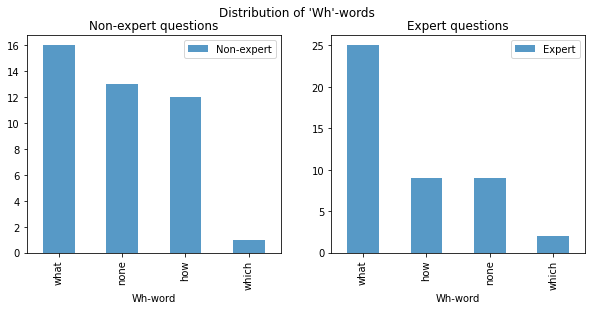

In [3]:
# Wh-words frequencies
def wh_words():
    df1 = df_cons_qu['Wh-word'].value_counts()
    df2 = df_exp_qu['Wh-word'].value_counts()
    #print(df_cons_qu['Wh-word'].value_counts())
    
    # Plot values by model, answer selection criteria by model
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
    
    df1 = pd.DataFrame({ 'Wh-word':['what', 'none', 'how','which'], 'Non-expert':df1})
    df1 = df1[["Wh-word","Non-expert"]]
    df1.set_index(["Wh-word"],inplace=True)
    df1.plot(ax=ax1, kind='bar',alpha=0.75, rot=90, title='Non-expert questions')
    
    df2 = pd.DataFrame({ 'Wh-word':['what', 'how', 'none', 'which'], 'Expert':df2})
    df2 = df2[["Wh-word","Expert"]]
    df2.set_index(["Wh-word"],inplace=True)
    df2.plot(ax=ax2, kind='bar',alpha=0.75, rot=90, title='Expert questions')
        
    plt.suptitle('Distribution of \'Wh\'-words')
    plt.xticks(rotation=90)
    plt.savefig('plots/wh_words.png')
print(wh_words())

### 2.2 Subject

### 2.3 Answer function
Distribution of answer functions

None


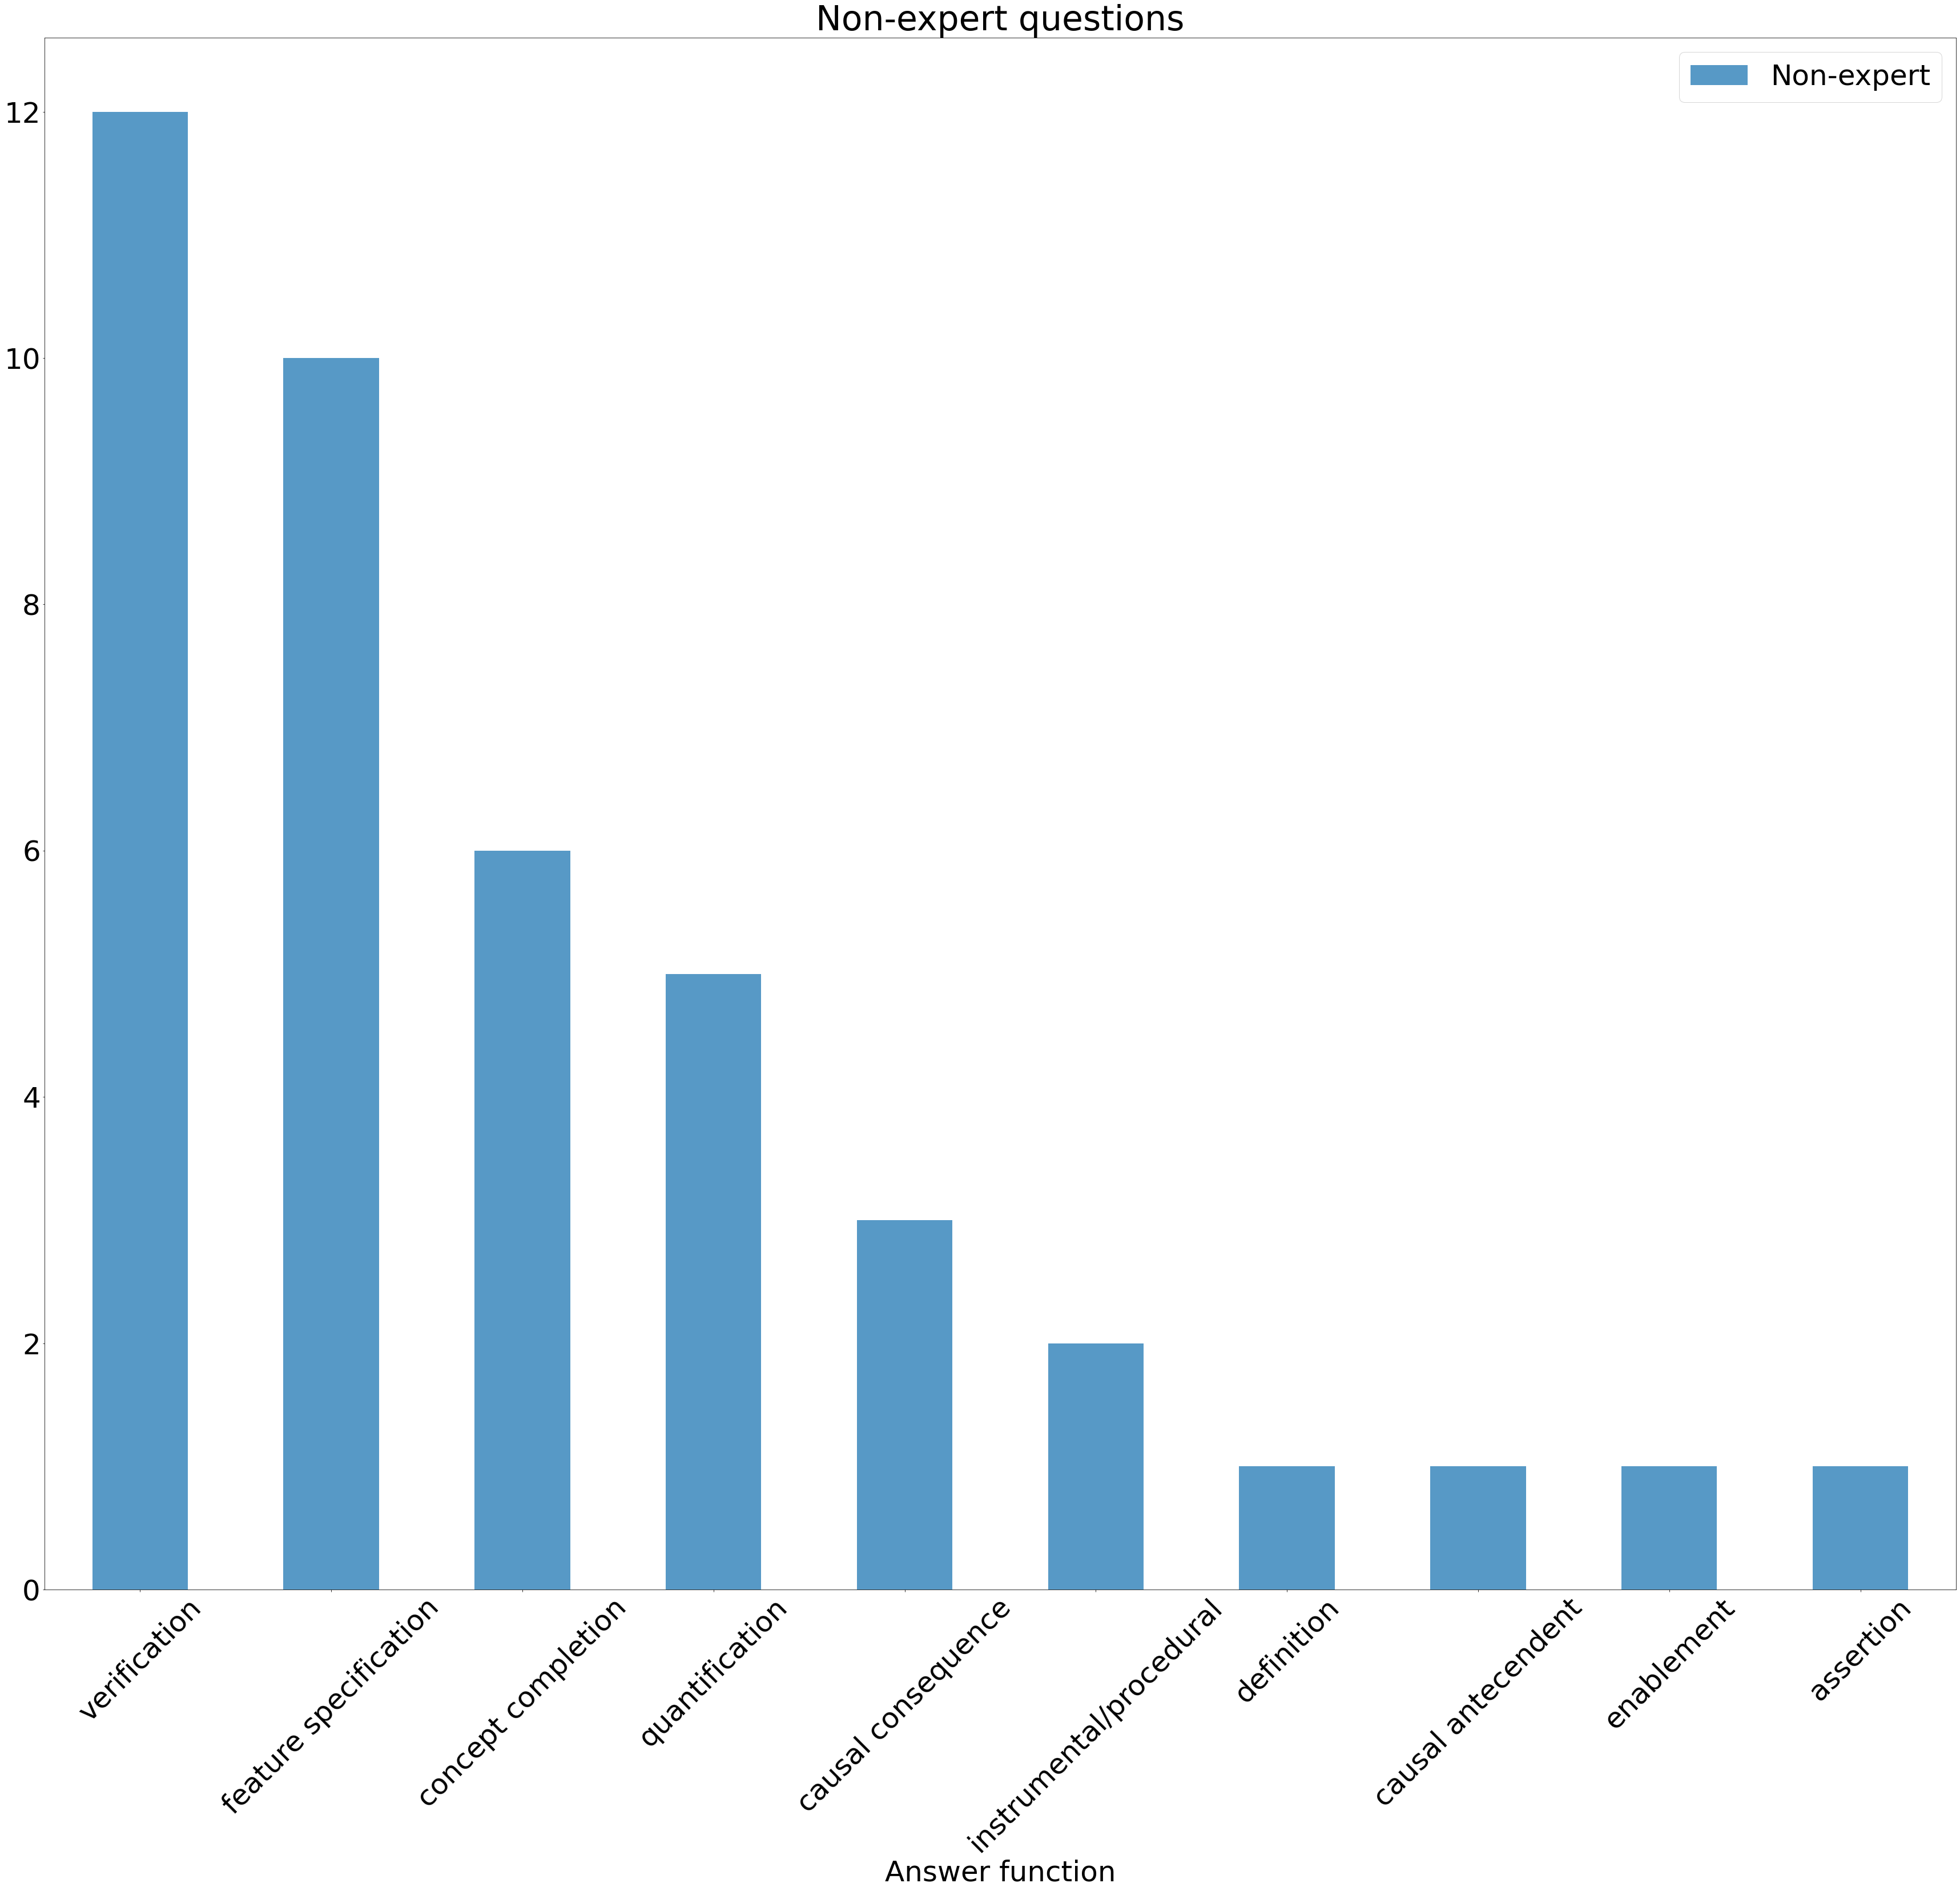

In [6]:
# Answer functions
def gold_ans_functions():
    df1 = df_cons_qu['Answer function'].value_counts()
    df2 = df_exp_qu['Answer function'].value_counts()
    
    # Plot values by model, answer selection criteria by model
    fig, ax1 = plt.subplots(1,1, figsize=(60,50))
    #fig, (ax1,ax2) = plt.subplots(1,2, figsize=(35,20))
    
    df1 = pd.DataFrame({ 'Answer function':['verification', 'feature specification', 'concept completion','quantification',
                                           'causal consequence', 'instrumental/procedural', 'definition', 'causal antecendent',
                                           'enablement', 'assertion'], 'Non-expert':df1})
    df1 = df1[['Answer function', "Non-expert"]]
    df1.set_index(['Answer function'],inplace=True)
    df1.plot(ax=ax1, kind='bar',alpha=0.75, rot=45, title='Non-expert questions')
    
    #df1.suptitle('Distribution of \'Gold\' answer functions')
    plt.rc('font', size=50)
    plt.rc('ytick', labelsize=50)
    plt.savefig('plots/gold_answer_functions_non_exp.png')
    
    '''df2 = pd.DataFrame({ 'Answer function':['feature specification', 'concept completion', 'verification', 'causal consequence',
                                           'quantification', 'definition', 'enablement', 'assertion', 'instrumental/procedural', 'interpretation'], 'Expert':df2})
    df2 = df2[['Answer function',"Expert"]]
    df2.set_index(['Answer function'],inplace=True)
    df2.plot(ax=ax1, kind='bar',alpha=0.75, rot=45, title='Expert questions')
    plt.rc('font', size=50)
    plt.rc('ytick', labelsize=50)
    plt.savefig('plots/gold_answer_functions_exp.png')'''
print(gold_ans_functions())

### 2.4 Length, syntactic analysis, lexical inventory

In [89]:
# Question length
def question_length(filename):
    nan = [a for a in filename['Length'].isnull().values]

    question_len = []
    count = 0
    for q in filename['Question']:
        if type(q)==str:
            question_len.append(len(q.split(' ')))
            count+=1
        else:
            question_len.append(0)
    filename['Length'] = question_len
    return filename

In [92]:
# Question length
df_cons_qu = question_length(df_cons_qu)
print('Consumer average question length: ', df_cons_qu['Length'].mean())
df_cons_qu.to_excel('../questions/question_analysis_cons_with_length.xlsx')
print('-----------------------------------------------------------')
df_exp_qu = question_length(df_exp_qu)
print('Expert average question length: ', df_exp_qu['Length'].mean())
df_exp_qu.to_excel('../questions/question_analysis_exp_with_length.xlsx')

Consumer average question length:  9.476190476190476
-----------------------------------------------------------
Expert average question length:  9.645833333333334


In [105]:
# Syntactic analysis
print('Syntactic features / properties\n\n')

# Polarity
print('Consumer questions:\n')
print('Polar questions: ', df_cons_qu['Polar'].str.count('yes').sum())
print('Non-polar questions: ', df_cons_qu['Polar'].str.count('no').sum())
print('------------------------------')
print('Expert questions:\n')
print('Polar questions: ', df_exp_qu['Polar'].str.count('yes').sum())
print('Non-polar questions: ', df_exp_qu['Polar'].str.count('no').sum())

Syntactic features / properties


Consumer questions:

Polar questions:  8
Non-polar questions:  34
------------------------------
Expert questions:

Polar questions:  8.0
Non-polar questions:  37.0


In [111]:
# Alternative / variable
print('Consumer questions:')
print('Alternative questions: ', df_cons_qu['Alternative / variable'].str.count('alternative').sum())
print('Variable questions: ', df_cons_qu['Alternative / variable'].str.count('variable').sum())
print('------------------------------')
print('Expert questions:')
print('Alternative questions: ', df_exp_qu['Alternative / variable'].str.count('alternative').sum())
print('Variable questions: ', df_exp_qu['Alternative / variable'].str.count('variable').sum())

Consumer questions:
Alternative questions:  14
Variable questions:  28
------------------------------
Expert questions:
Alternative questions:  14.0
Variable questions:  31.0


In [112]:
# Bias
print('Consumer questions:')
print('Biased questions: ', df_cons_qu['Bias'].str.count('yes').sum())
print('Non-biased questions: ', df_cons_qu['Bias'].str.count('no').sum())
print('------------------------------')
print('Expert questions:')
print('Biased questions: ', df_exp_qu['Bias'].str.count('yes').sum())
print('Non-biased questions: ', df_exp_qu['Bias'].str.count('no').sum())

Consumer questions:
Biased questions:  3
Non-biased questions:  39
------------------------------
Expert questions:
Biased questions:  4.0
Non-biased questions:  41.0


In [113]:
# Scientific vocabulary
print('Consumer questions:')
print('Questions with scientific / medical vocabulary: ', df_cons_qu['Scientific vocabulary'].str.count('yes').sum())
print('Questions with general-domain vocabulary:', df_cons_qu['Scientific vocabulary'].str.count('no').sum())
print('------------------------------')
print('Expert questions:')
print('Questions with scientific / medical vocabulary: ', df_exp_qu['Scientific vocabulary'].str.count('yes').sum())
print('Questions with general-domain vocabulary: ', df_exp_qu['Scientific vocabulary'].str.count('no').sum())

Consumer questions:
Questions with scientific / medical vocabulary:  4
Questions with general-domain vocabulary: 38
------------------------------
Expert questions:
Questions with scientific / medical vocabulary:  11.0
Questions with general-domain vocabulary:  34.0
